## Grabbing blobs from Azure

In [ ]:
!pip install azure-storage-blob
!pip install odfpy pandas

from azure.storage.blob import BlobServiceClient

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.4/408.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=14a2d804cdcf1883bcb0b9dc56ef2bacbb0b1b1c3641083fd7fd1f7fee2b526c
  Stored in directory: /root/.cache/pip/wheels/d6/1d/c8/8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy


In [ ]:
# Replace with your details
STORAGE_ACCOUNT_NAME = "EXAMPLE"
STORAGE_ACCOUNT_KEY = "EXAMPLE"
CONTAINER_NAME = "bronze"

# Construct the connection string
connection_string = "EXAMPLE"

# Create the BlobServiceClient object
blob_service_client = BlobServiceClient.from_connection_string(connection_string)
print("Connected to Azure Blob Storage successfully!")


container_client = blob_service_client.get_container_client(CONTAINER_NAME)

# List blobs
print("Listing blobs...")
for blob in container_client.list_blobs():
    print(blob.name)


Connected to Azure Blob Storage successfully!
Listing blobs...
CPS
CPS/CPS Caseload
CPS/CPS Caseload/CPS-Court-Caseload-Tables-Q2-24-25.xlsx
CPS/CPS Caseload/CPS-Court-Caseload-Tables-Q3-23-24.xlsx
CPS/Pre-Charge Data
CPS/Pre-Charge Data/Pre-Charge Data Tables Year Ending December 2020_0.xlsx
CPS/Pre-Charge Data/Pre-Charge-Data-Tables-Q2-24-25.xlsx
CPS/Pre-Charge Data/Pre-Charge-Data-Tables-Year-Ending-Dec-2022.xlsx
CPS/Pre-Charge Data/Pre-Charge-Data-Tables-Year-Ending-December-2019.xlsx
CPS/Pre-Charge Data/Pre-Charge-Data-Tables-Year-Ending-December-2021.xlsx
CPS/Pre-Charge Data/Pre-Charge-Quarterly-Reports-Q3-23-24-updated-Sept-24.xlsx
CPS/Prosecution tables
CPS/Prosecution tables/Prosecution Data Tables Year Ending December 2020.xlsx
CPS/Prosecution tables/Prosecution-Data-Tables-Q2-24-25.xlsx
CPS/Prosecution tables/Prosecution-Data-Tables-Q3-23-24.xlsx
CPS/Prosecution tables/Prosecution-Data-Tables-Year-Ending-Dec-2022.xlsx
CPS/Prosecution tables/Prosecution-Data-Tables-Year-Endin

In [ ]:
FOLDER_PATH = "prison_data/receptions/"
# List all blobs in the specified folder
file_names = [blob.name for blob in container_client.list_blobs(name_starts_with=FOLDER_PATH)]

# Print the file names
print("Files in 'prison_data/receptions':")
print(file_names)

Files in 'prison_data/receptions':
['prison_data/receptions/Prison-receptions-Jan-to-Mar-2024.ods', 'prison_data/receptions/Prison-receptions-Oct-to-Dec-2023.ods', 'prison_data/receptions/Receptions_Q1_2020.ods', 'prison_data/receptions/Receptions_Q1_2021.ods', 'prison_data/receptions/Receptions_Q1_2022.ods', 'prison_data/receptions/Receptions_Q2_2019.xlsx', 'prison_data/receptions/Receptions_Q2_2020.ods', 'prison_data/receptions/Receptions_Q2_2021.ods', 'prison_data/receptions/Receptions_Q2_2022.ods', 'prison_data/receptions/Receptions_Q2_2023.ods', 'prison_data/receptions/Receptions_Q32023.ods', 'prison_data/receptions/Receptions_Q3_2019.xlsx', 'prison_data/receptions/Receptions_Q3_2020.ods', 'prison_data/receptions/Receptions_Q3_2021.ods', 'prison_data/receptions/Receptions_Q3_2022.ods', 'prison_data/receptions/Receptions_Q42019.ods', 'prison_data/receptions/Receptions_Q4_2020.ods', 'prison_data/receptions/Receptions_Q4_2021.ods', 'prison_data/receptions/Receptions_Q4_2022.ods', 'pr

### Prison receptions data

In [ ]:
file_names

['prison_data/receptions/Prison-receptions-Jan-to-Mar-2024.ods',
 'prison_data/receptions/Prison-receptions-Oct-to-Dec-2023.ods',
 'prison_data/receptions/Receptions_Q1_2020.ods',
 'prison_data/receptions/Receptions_Q1_2021.ods',
 'prison_data/receptions/Receptions_Q1_2022.ods',
 'prison_data/receptions/Receptions_Q2_2019.xlsx',
 'prison_data/receptions/Receptions_Q2_2020.ods',
 'prison_data/receptions/Receptions_Q2_2021.ods',
 'prison_data/receptions/Receptions_Q2_2022.ods',
 'prison_data/receptions/Receptions_Q2_2023.ods',
 'prison_data/receptions/Receptions_Q32023.ods',
 'prison_data/receptions/Receptions_Q3_2019.xlsx',
 'prison_data/receptions/Receptions_Q3_2020.ods',
 'prison_data/receptions/Receptions_Q3_2021.ods',
 'prison_data/receptions/Receptions_Q3_2022.ods',
 'prison_data/receptions/Receptions_Q42019.ods',
 'prison_data/receptions/Receptions_Q4_2020.ods',
 'prison_data/receptions/Receptions_Q4_2021.ods',
 'prison_data/receptions/Receptions_Q4_2022.ods',
 'prison_data/recept

In [ ]:
import os
from azure.storage.blob import BlobClient

def loading_single_blob(blob_name, local_path):
    """
    Downloads a blob from Azure Storage and saves it to the specified local path.

    Args:
        blob_name (str): The name of the blob in Azure Storage.
        local_path (str): The full local file path where the blob will be saved.
    """
    # Ensure directory exists
    os.makedirs(os.path.dirname(local_path), exist_ok=True)

    # Create blob client
    blob_client = blob_service_client.get_blob_client(container=CONTAINER_NAME, blob=blob_name)

    # Check if blob exists
    if blob_client.exists():
        print(f"File '{blob_name}' exists! Proceeding with download...")
        with open(local_path, "wb") as file:
            file.write(blob_client.download_blob().readall())
        print(f"Download complete: {local_path}")
    else:
        print(f"File '{blob_name}' not found in the container!")


local_file_names = []
for f in file_names:
  blob_name = f
  local_path = "/content/"+blob_name
  loading_single_blob(blob_name, local_path)
  local_file_names.append(local_path)


File 'prison_data/receptions/Prison-receptions-Jan-to-Mar-2024.ods' exists! Proceeding with download...
Download complete: /content/prison_data/receptions/Prison-receptions-Jan-to-Mar-2024.ods
File 'prison_data/receptions/Prison-receptions-Oct-to-Dec-2023.ods' exists! Proceeding with download...
Download complete: /content/prison_data/receptions/Prison-receptions-Oct-to-Dec-2023.ods
File 'prison_data/receptions/Receptions_Q1_2020.ods' exists! Proceeding with download...
Download complete: /content/prison_data/receptions/Receptions_Q1_2020.ods
File 'prison_data/receptions/Receptions_Q1_2021.ods' exists! Proceeding with download...
Download complete: /content/prison_data/receptions/Receptions_Q1_2021.ods
File 'prison_data/receptions/Receptions_Q1_2022.ods' exists! Proceeding with download...
Download complete: /content/prison_data/receptions/Receptions_Q1_2022.ods
File 'prison_data/receptions/Receptions_Q2_2019.xlsx' exists! Proceeding with download...
Download complete: /content/prison_

In [ ]:
local_file_names

['/content/prison_data/receptions/Prison-receptions-Jan-to-Mar-2024.ods',
 '/content/prison_data/receptions/Prison-receptions-Oct-to-Dec-2023.ods',
 '/content/prison_data/receptions/Receptions_Q1_2020.ods',
 '/content/prison_data/receptions/Receptions_Q1_2021.ods',
 '/content/prison_data/receptions/Receptions_Q1_2022.ods',
 '/content/prison_data/receptions/Receptions_Q2_2019.xlsx',
 '/content/prison_data/receptions/Receptions_Q2_2020.ods',
 '/content/prison_data/receptions/Receptions_Q2_2021.ods',
 '/content/prison_data/receptions/Receptions_Q2_2022.ods',
 '/content/prison_data/receptions/Receptions_Q2_2023.ods',
 '/content/prison_data/receptions/Receptions_Q32023.ods',
 '/content/prison_data/receptions/Receptions_Q3_2019.xlsx',
 '/content/prison_data/receptions/Receptions_Q3_2020.ods',
 '/content/prison_data/receptions/Receptions_Q3_2021.ods',
 '/content/prison_data/receptions/Receptions_Q3_2022.ods',
 '/content/prison_data/receptions/Receptions_Q42019.ods',
 '/content/prison_data/rec

In [ ]:
import os
import pandas as pd
from odf.opendocument import load
from odf.table import Table, TableRow, TableCell
from odf.text import P

def extract_ods_contents(local_path):
    """Extracts the 'Contents' sheet from an ODS file and returns it as a DataFrame."""
    doc = load(local_path)

    for sheet in doc.spreadsheet.getElementsByType(Table):
        if sheet.getAttribute('name') == 'Contents':
            data = []
            for row in sheet.getElementsByType(TableRow):
                row_data = []
                for cell in row.getElementsByType(TableCell):
                    text_elements = cell.getElementsByType(P)
                    cell_text = " ".join(["".join(node.data for node in t.childNodes if node.nodeType == node.TEXT_NODE) for t in text_elements]) if text_elements else ""
                    row_data.append(cell_text)
                data.append(row_data)

            df = pd.DataFrame(data)
            df = df.dropna(how='all').dropna(axis=1, how='all')  # Remove empty rows and columns
            return df

    print(f"Warning: 'Contents' sheet not found in {local_path}")
    return None  # Return None if no 'Contents' sheet is found

def extract_xlsx_contents(local_path):
    """Extracts the 'Contents' sheet from an XLSX file and returns it as a DataFrame."""
    xls = pd.ExcelFile(local_path)
    if 'Contents' in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name='Contents')
        df = df.dropna(how='all').dropna(axis=1, how='all')  # Remove empty rows and columns
        return df

    print(f"Warning: 'Contents' sheet not found in {local_path}")
    return None

def load_contents_sheets(file_paths):
    """Loads 'Contents' sheets from a list of .ods and .xlsx files."""
    results = []

    for path in file_paths:
        ext = os.path.splitext(path)[-1].lower()
        df = None

        if ext == '.ods':
            df = extract_ods_contents(path)
        elif ext in ['.xls', '.xlsx']:  # Handles both .xls and .xlsx
            df = extract_xlsx_contents(path)

        if df is not None:
            results.append({'local_path': path, 'df': df})

    return results


In [ ]:
results = load_contents_sheets(local_file_names)

In [ ]:
def list_sheets(local_path):
    """Lists all sheet names in an ODS file."""
    doc = load(local_path)
    sheet_names = [sheet.getAttribute('name') for sheet in doc.spreadsheet.getElementsByType(Table)]
    return sheet_names

local_path = '/content/prison_data/receptions/Receptions_Q2_2023.ods'
# Get all sheet names in the file
sheet_names = list_sheets(local_path)
sheet_names


['Contents', '2_1', '2_2', '2_3', '2_4a', '2_4b', '2_5a', '2_5b', '2_6', '2_7']

In [ ]:
# Load the new spreadsheet
new_file_path = local_path

# Read the 'Contents' sheet to understand the different sheets
new_contents_df = pd.read_excel(new_file_path, sheet_name="Contents")

# Display the first few rows to understand its structure
new_contents_df.head()


# Clean and reset index of the new "Contents" sheet
new_contents_df_cleaned = new_contents_df.dropna().reset_index(drop=True)

# Identify the sheet names related to the required topics
new_topics = {
    "first receptions": None,
    "remand admissions": None,
    "sentenced admissions": None,
    "recall admissions": None,
}

# Define broader keywords for the topics
new_keywords = {
    # "first receptions": ["first reception", "new receptions", "prison receptions"],
    "remand admissions": ["remand admission", "remand receptions", "remand population"],
    "sentenced admissions": ["sentenced admission", "sentenced receptions", "sentenced prisoners"],
    "recall admissions": ["recall admission", "recalls to prison", "prison recalls"],
}

# Loop through the contents to find the first sheet covering each topic
for index, row in new_contents_df_cleaned.iterrows():
    table_name = str(row.iloc[0]).strip()
    description = str(row.iloc[1]).strip().lower()

    for topic, terms in new_keywords.items():
        if any(term in description for term in terms) and new_topics[topic] is None:
            new_topics[topic] = table_name

new_topics



{'first receptions': None,
 'remand admissions': 'Table 2.4a',
 'sentenced admissions': 'Table 2.5a',
 'recall admissions': 'Table 2.6'}

In [ ]:
# Load all sheet names from the new file to determine the correct formatting
new_sheet_names = pd.ExcelFile(new_file_path).sheet_names
new_sheet_names

# Corrected sheet names
corrected_sheets = {
    # "first receptions": "2_1",
    "remand admissions": "2_4a",
    "sentenced admissions": "2_5a",
    "recall admissions": "2_6",
}

# Read data from each correctly formatted sheet
corrected_dataframes = {}
for topic, sheet in corrected_sheets.items():
    try:
        corrected_dataframes[topic] = pd.read_excel(new_file_path, sheet_name=sheet)
    except Exception as e:
        corrected_dataframes[topic] = str(e)  # Store the error if the sheet cannot be read


In [ ]:
corrected_dataframes

{'remand admissions':    Table 2.4a: Remand admissions into prison by type of custody, age group and sex  \
 0                                                 NaN                                
 1                                                                                    
 2                                   Males and Females                                
 3                              Untried admissions (1)                                
 4                                              Adults                                
 5                                     18-20 year olds                                
 6                                     15-17 year olds                                
 7                Convicted unsentenced admissions (2)                                
 8                                              Adults                                
 9                                     18-20 year olds                                
 10                   

In [ ]:
from odf.opendocument import load
from odf.table import Table, TableRow, TableCell
from odf.text import P

example_blob = '/content/prison_data/receptions/Receptions_Q32023.ods'

def inspect_local_blob_content(local_path):
  # Load the ODS file
  doc = load(local_path)

  # Extract spreadsheet content
  for sheet in doc.spreadsheet.getElementsByType(Table):
      print(f"\nSheet: {sheet.getAttribute('name')}")

      for row in sheet.getElementsByType(TableRow)[:10]:  # Show first 5 rows
          row_data = []
          for cell in row.getElementsByType(TableCell):
              text_elements = cell.getElementsByType(P)

              # Extract text from all child nodes
              if text_elements:
                  cell_text = " ".join(["".join(node.data for node in t.childNodes if node.nodeType == node.TEXT_NODE) for t in text_elements])
              else:
                  cell_text = ""  # Handle empty cells

              row_data.append(cell_text)

          print(row_data)

# local_path = "/content/prison_data/receptions/Receptions_Q2_2022.ods"  # Adjust path as needed
inspect_local_blob_content(example_blob)

"""
- inspect the different sheets related to prison admissions data. Find the sheets of interest:
  1. Remand admissions
  2. Sentenced admissions
  3. Recall admissions
- get the sheet names of these sheets (e.g. "2_4a"), store them in dicts
- within each sheet, wrangle to effective data into a data frame
- within each dataframe, trim/sum the data by removing uneccesary granularity,
  so that we keep only quarterly, and national totals
"""


Sheet: Contents
['Prison receptions: July to September 2023', '', '']
['Contents', '']
['Table 2.1', 'First prison receptions by type of first reception, sentence length and sex', '']
['Table 2.2', 'First prison receptions by nationality', '']
['Table 2.3', 'First prison receptions by establishment and sex', '']
['Table 2.4a', 'Remand admissions into prison by type of custody, age group and sex', '']
['Table 2.4b', 'Remand admissions into prison by type of custody, offence group and sex', '']
['Table 2.5a', 'Sentenced admissions into prison by sentence length, age group and sex', '']
['Table 2.5b', 'Immediate custodial sentenced admissions into prison by offence group and sex', '']
['Table 2.6', 'Recall admissions into prison by sentence length at time of recall, age group and sex', '']

Sheet: 2_1
['Table 2.1: First prison receptionsby type of first reception, sentence length and sex', '', '', 'Contents', '']
['', 'Jul-Sep 2022', 'Oct-Dec 2022', 'Jan-Mar 2023', 'Apr-Jun 2023', 'Jul-S

'\n- inspect the different sheets related to prison admissions data. Find the sheets of interest:\n  1. Remand admissions\n  2. Sentenced admissions\n  3. Recall admissions\n- get the sheet names of these sheets (e.g. "2_4a"), store them in dicts\n- within each sheet, wrangle to effective data into a data frame\n- within each dataframe, trim/sum the data by removing uneccesary granularity, \n  so that we keep only quarterly, and national totals\n'

## Inspecting the blobs and wrangling them


Sheet: Contents
['Prison receptions: April to June 2022', '', '']
['', '', '']
['Contents', '', '', '']
['', 'First prison receptions by type of first reception, sentence length and sex', '', '']
['', '', '', '']

Sheet: 2_1
['Table 2.1: First prison receptionsby type of first reception, sentence length and sex', 'Contents', '']
['', 'Apr-Jun 2021', 'Jul-Sep 2021', 'Oct-Dec 2021', 'Jan-Mar 2022', 'Apr-Jun 2022', 'Percentage change April to June 2021 to 2022', '', '', '']
['Males and Females', '', '', '', '', '', '']
['First receptions', '15,206', '15,103', '15,000', '15,354', '15,944', '5%', '', '', '', '']
['Remand first receptions', '9,359', '9,383', '9,318', '9,581', '10,048', '7%', '', '', '']

Sheet: 2_2
['Table 2.2: First prison receptionsby nationality', 'Contents', '']
['', 'Apr-Jun 2021', 'Jul-Sep 2021', 'Oct-Dec 2021', 'Jan-Mar 2022', 'Apr-Jun 2022', 'Percentage change April to June 2021 to 2022', '', '']
['Total first receptions', '15,206', '15,103', '15,000', '15,354', '15

'\n- inspect the different sheets related to prison admissions data. Find the sheets of interest:\n  1. Remand admissions\n  2. Sentenced admissions\n  3. Recall admissions\n- get the sheet names of these sheets (e.g. "2_4a"), store them in dicts\n- within each sheet, wrangle to effective data into a data frame\n- within each dataframe, trim/sum the data by removing uneccesary granularity, \n  so that we keep only quarterly, and national totals\n'

## Chaining wrangles together

In [ ]:
# Example usage
blob_name = "cross_cjs_data/silver_prisons.csv"
local_path = "/content/cross_cjs_data/silver_prisons.csv"  # Adjust path as needed
loading_single_blob(blob_name, local_path)

File 'cross_cjs_data/silver_prisons.csv' exists! Proceeding with download...
Download complete: /content/cross_cjs_data/silver_prisons.csv


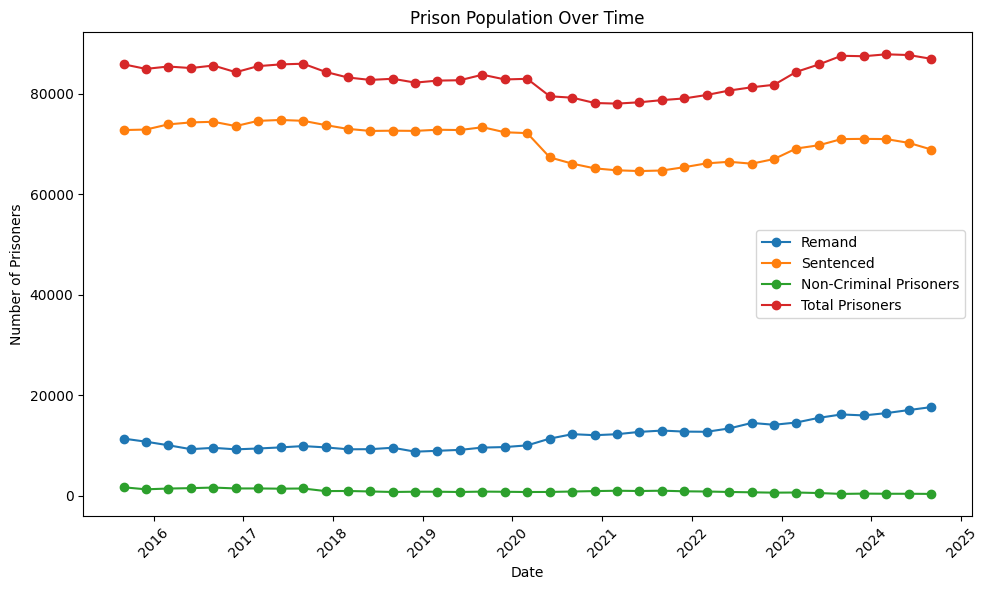

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
silver_prisons_df = pd.read_csv("/content/cross_cjs_data/silver_prisons.csv")

# Convert the 'date' column to datetime format
silver_prisons_df['date'] = pd.to_datetime(silver_prisons_df['date'], errors='coerce')

# Clean and cast relevant columns to integers (removing commas if present)
silver_prisons_df['remand'] = silver_prisons_df['remand'].str.replace(',', '').astype(int)
silver_prisons_df['sentenced'] = silver_prisons_df['sentenced'].str.replace(',', '').astype(int)
silver_prisons_df['non_criminal_prisoners'] = silver_prisons_df['non_criminal_prisoners'].str.replace(',', '').astype(int)
silver_prisons_df['total_prisoners'] = silver_prisons_df['total_prisoners'].str.replace(',', '').astype(int)

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot each of the columns against 'date'
plt.plot(silver_prisons_df['date'], silver_prisons_df['remand'], label='Remand', marker='o')
plt.plot(silver_prisons_df['date'], silver_prisons_df['sentenced'], label='Sentenced', marker='o')
plt.plot(silver_prisons_df['date'], silver_prisons_df['non_criminal_prisoners'], label='Non-Criminal Prisoners', marker='o')
plt.plot(silver_prisons_df['date'], silver_prisons_df['total_prisoners'], label='Total Prisoners', marker='o')

# Labeling the axes and adding title
plt.title('Prison Population Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Prisoners')
plt.legend()

# Rotate the date labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
silver_prisons_df

,Unnamed: 0,calendar_year,date,remand,sentenced,non_criminal_prisoners,total_prisoners
0,0,2015,2015-09-01,11390,72795,1701,85886
1,1,2015,2015-12-01,10779,72892,1297,84968
2,2,2016,2016-03-01,10066,73925,1450,85441
3,3,2016,2016-06-01,9288,74316,1530,85134
4,4,2016,2016-09-01,9551,74442,1646,85639
5,5,2016,2016-12-01,9251,73588,1468,84307
6,6,2017,2017-03-01,9419,74623,1471,85513
7,7,2017,2017-06-01,9638,74803,1422,85863
8,8,2017,2017-09-01,9902,74635,1460,85997
9,9,2017,2017-12-01,9639,73789,945,84373


# Data from G-sheet

In [16]:
# Authenticate yourself for BigQuery and Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
import pandas as pd
from google.auth import default

# Get credentials
creds, _ = default()
gc = gspread.authorize(creds)

print("Authenticated")


Authenticated


In [28]:
def read_from_google_sheet_as_df(worksheet_name,
                                 sheet_name = "Voice of the Customer - Monthly Reports"):
    # open the google sheet by name, and return all its content as df
    try:
        sheet = gc.open(sheet_name).worksheet(worksheet_name)
        df = pd.DataFrame(sheet.get_all_records())
    except gspread.SpreadsheetNotFound:
        print(f"Spreadsheet {sheet_name} not found.")
        return
    except gspread.WorksheetNotFound:
        print(f"Worksheet {worksheet_name} not found in {sheet_name}.")
        return
    return df

sheet_name = "hack_hmt_criminal_justice_data"

In [53]:
worksheet_name = "prison"
prison_df = read_from_google_sheet_as_df(worksheet_name, sheet_name=sheet_name)
worksheet_name = "police"
police_df = read_from_google_sheet_as_df(worksheet_name, sheet_name=sheet_name)
worksheet_name = "court"
court_df = read_from_google_sheet_as_df(worksheet_name, sheet_name=sheet_name)
worksheet_name = "population"
population_df = read_from_google_sheet_as_df(worksheet_name, sheet_name=sheet_name)

In [54]:
police_df.describe()
court_df.describe()
prison_df.describe()
population_df.describe()

,period,year,prison__population__remand,prison__population__sentenced,prison__population__non_crime,prison__population__total,court__case_backlog_mc,court__case_backlog_cc
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.500000,2020.750000,12298.541667,69057.875000,763.958333,82120.375000,341240.333333,51972.875000
std,7.071068,1.799758,2488.224458,3246.568628,175.612587,3000.557177,42007.171315,12998.185212
min,1.000000,2018.000000,8788.000000,64637.000000,381.000000,78058.000000,282245.000000,32936.000000
25%,6.750000,2019.000000,9681.500000,66101.500000,690.500000,79444.250000,297289.250000,37405.000000
50%,12.500000,2021.000000,12500.500000,69445.000000,790.500000,82435.000000,343723.000000,58270.000000
75%,18.250000,2022.000000,14234.000000,72419.500000,863.000000,83206.250000,364272.000000,62312.250000
max,24.000000,2024.000000,16458.000000,73366.000000,1020.000000,87869.000000,422156.000000,68568.000000


In [55]:
print(population_df.columns)

Index(['period', 'year', 'quarter_ending', 'prison__population__remand',
       'prison__population__sentenced', 'prison__population__non_crime',
       'prison__population__total', 'court__case_backlog_mc',
       'court__case_backlog_cc'],
      dtype='object')


In [60]:
import pandas as pd

# Merge the DataFrames sequentially while avoiding duplicate columns
merged_df = police_df.merge(court_df, on="period", how="outer", suffixes=("", "_dup1"))
merged_df = merged_df.merge(prison_df, on="period", how="outer", suffixes=("", "_dup2"))
merged_df = merged_df.merge(population_df, on="period", how="outer", suffixes=("", "_dup3"))

# Drop duplicated columns (if any were created)
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains("_dup")]


In [ ]:
!pip install linearmodels
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.iv import IV2SLS  # IV Regression library

In [61]:
merged_df.columns

Index(['period', 'year', 'quarter_ending', 'police__recorded_crimes',
       'police__investigations_closed', 'police__charges',
       'police__non_police_charges', 'court___mc_start',
       'court___mc_convictions', 'court___mc_sentenced',
       'court___mc_sentenced_custody', 'court___cc_start',
       'court___cc_convictions', 'court___cc_sentenced',
       'court___cc_sentenced_custody', 'court__cc_wait_to_start_trial',
       'court__cc_wait_trial_to_sentence', 'court__mc_wait_to_start_trial',
       'court__mc_wait_trial_to_sentence', 'prison__releases__from_sentences',
       'prison__releases__home_detention_curfew',
       'prison__receptions__remand_admissions',
       'prison__receptions__sentenced_admissions',
       'prison__receptions__recall_admissions', 'prison__population__remand',
       'prison__population__sentenced', 'prison__population__non_crime',
       'prison__population__total', 'court__case_backlog_mc',
       'court__case_backlog_cc'],
      dtype='objec

### model 1

In [96]:
model_1 = merged_df[[
    "period",
    # target var
    "court___mc_start",
    # model inputs
    "police__recorded_crimes",
    # "police__investigations_closed",
    # "police__charges",
    # "police__non_police_charges",
    # backlog inut
    "court__mc_wait_to_start_trial",
    # "court__cc_wait_to_start_trial",
    "court__case_backlog_mc",
    # "court__case_backlog_cc"
]]

In [97]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Define variables for lagging
lagged_vars = [
    "police__recorded_crimes",
    # "police__non_police_charges",
    "court__mc_wait_to_start_trial",
    "court__case_backlog_mc"
]

# Step 1: Create Lagged Features (1 to 3 periods)
for lag in range(1, 4):  # Creating lagged features for 1, 2, and 3 periods
    # for var in lagged_vars:
    model_1[f"police__recorded_crimes_lag{lag}"] = model_1["police__recorded_crimes"].shift(lag)

# Drop rows with NaN values due to lagging
model_1.dropna(inplace=True)

# Step 2: Define Regression Inputs
y = model_1["court___mc_start"]  # Target variable

# **Independent Variables**
X = model_1.drop(columns=["court___mc_start", "period"])  # Remove target & period

# Step 3: Add Constant Term (Intercept)
X = sm.add_constant(X)

# Step 4: Train OLS Regression Model
model = sm.OLS(y, X).fit()

# Display Regression Summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       court___mc_start   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     4.614
Date:                Fri, 07 Feb 2025   Prob (F-statistic):            0.00867
Time:                        11:45:58   Log-Likelihood:                -244.73
No. Observations:                  21   AIC:                             503.5
Df Residuals:                      14   BIC:                             510.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

<ipython-input-97-935e2fae0827>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_1[f"police__recorded_crimes_lag{lag}"] = model_1["police__recorded_crimes"].shift(lag)
<ipython-input-97-935e2fae0827>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_1[f"police__recorded_crimes_lag{lag}"] = model_1["police__recorded_crimes"].shift(lag)
<ipython-input-97-935e2fae0827>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [100]:
# Extract coefficients from the model summary
impact_t0 = model.params.get("police__recorded_crimes", 0)
impact_t1 = model.params.get("police__recorded_crimes_lag1", 0)
impact_t2 = model.params.get("police__recorded_crimes_lag2", 0)
impact_t3 = model.params.get("police__recorded_crimes_lag3", 0)
impact_t4 = model.params.get("police__recorded_crimes_lag4", 0)  # If available

# Summarize the results
impact_results = pd.DataFrame({
    "Time Period": ["t0 (Current)", "t1 (Next Period)", "t2", "t3", "t4"],
    "Impact per Unit Increase": [impact_t0, impact_t1, impact_t2, impact_t3, impact_t4]
})

impact_results

# Print total cumulative effect over time
total_impact = impact_t0 + impact_t1 + impact_t2 + impact_t3 + impact_t4
print(f"\nTotal estimated impact of a 1-unit increase in police recordedc crimes on MC prosecutions over 5 periods: {total_impact:.3f}")



Total estimated impact of a 1-unit increase in police recordedc crimes on MC prosecutions over 5 periods: 0.240


In [101]:
impact_results

,Time Period,Impact per Unit Increase
0,t0 (Current),0.105742
1,t1 (Next Period),0.016829
2,t2,0.081870
3,t3,0.035632
4,t4,0.000000


### model 2

In [103]:
model_2 = merged_df[[
    "period",
    # target var
    "court___cc_start",
    # model inputs
    "police__recorded_crimes",
    # "police__investigations_closed",
    # "police__charges",
    # "police__non_police_charges",
    # backlog inut
    "court__cc_wait_to_start_trial",
    # "court__cc_wait_to_start_trial",
    "court__case_backlog_cc",
    # "court__case_backlog_cc"
]]

In [107]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Define variables for lagging
lagged_vars = [
    "police__recorded_crimes",
    # "police__non_police_charges",
    "court__cc_wait_to_start_trial",
    "court__case_backlog_cc"
]

# Step 1: Create Lagged Features (1 to 3 periods)
for lag in range(1, 8):  # Creating lagged features for 1, 2, and 3 periods
    # for var in lagged_vars:
    model_2[f"police__recorded_crimes_lag{lag}"] = model_2["police__recorded_crimes"].shift(lag)

# Drop rows with NaN values due to lagging
model_2.dropna(inplace=True)

# Step 2: Define Regression Inputs
y = model_2["court___cc_start"]  # Target variable

# **Independent Variables**
X = model_2.drop(columns=["court___cc_start", "period"])  # Remove target & period

# Step 3: Add Constant Term (Intercept)
X = sm.add_constant(X)

# Step 4: Train OLS Regression Model
model = sm.OLS(y, X).fit()

# Display Regression Summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       court___cc_start   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 07 Feb 2025   Prob (F-statistic):                nan
Time:                        11:54:58   Log-Likelihood:                 174.35
No. Observations:                   8   AIC:                            -332.7
Df Residuals:                       0   BIC:                            -332.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

<ipython-input-107-c24772faa5cf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_2[f"police__recorded_crimes_lag{lag}"] = model_2["police__recorded_crimes"].shift(lag)
<ipython-input-107-c24772faa5cf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_2[f"police__recorded_crimes_lag{lag}"] = model_2["police__recorded_crimes"].shift(lag)
<ipython-input-107-c24772faa5cf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [109]:
# Extract coefficients from the model summary
impact_t0 = model.params.get("police__recorded_crimes", 0)
impact_t1 = model.params.get("police__recorded_crimes_lag1", 0)
impact_t2 = model.params.get("police__recorded_crimes_lag2", 0)
impact_t3 = model.params.get("police__recorded_crimes_lag3", 0)
impact_t4 = model.params.get("police__recorded_crimes_lag4", 0)  # If available
impact_t5 = model.params.get("police__recorded_crimes_lag5", 0)
impact_t6 = model.params.get("police__recorded_crimes_lag6", 0)
impact_t7 = model.params.get("police__recorded_crimes_lag7", 0)

# Summarize the results
impact_results = pd.DataFrame({
    "Time Period": ["t0 (Current)", "t1 (Next Period)", "t2", "t3", "t4", "t5", "t6", "t7"],
    "Impact per Unit Increase": [impact_t0, impact_t1, impact_t2, impact_t3, impact_t4,impact_t5,impact_t6,impact_t7]
})

impact_results

# Print total cumulative effect over time
total_impact = impact_t0 + impact_t1 + impact_t2 + impact_t3 + impact_t4 +impact_t5+impact_t6+impact_t7
print(f"\nTotal estimated impact of a 1-unit increase in police recordedc crimes on MC prosecutions over 8 periods: {total_impact:.3f}")



Total estimated impact of a 1-unit increase in police recordedc crimes on MC prosecutions over 8 periods: 0.010


In [110]:
impact_results

,Time Period,Impact per Unit Increase
0,t0 (Current),0.043058
1,t1 (Next Period),-0.074947
2,t2,0.021515
3,t3,-0.002498
4,t4,0.001652
5,t5,0.033772
6,t6,0.001609
7,t7,-0.013740


### model 3

In [ ]:
Index(['period', 'year', 'quarter_ending', 'police__recorded_crimes',
       'police__investigations_closed', 'police__charges',
       'police__non_police_charges', 'court___mc_start',
       'court___mc_convictions', 'court___mc_sentenced',
       'court___mc_sentenced_custody', 'court___cc_start',
       'court___cc_convictions', 'court___cc_sentenced',
       'court___cc_sentenced_custody', 'court__cc_wait_to_start_trial',
       'court__cc_wait_trial_to_sentence', 'court__mc_wait_to_start_trial',
       'court__mc_wait_trial_to_sentence', 'prison__releases__from_sentences',
       'prison__releases__home_detention_curfew',
       'prison__receptions__remand_admissions',
       'prison__receptions__sentenced_admissions',
       'prison__receptions__recall_admissions', 'prison__population__remand',
       'prison__population__sentenced', 'prison__population__non_crime',
       'prison__population__total', 'court__case_backlog_mc',
       'court__case_backlog_cc'],
      dtype='object')

In [119]:
model_3 = merged_df[[
    "period",
    # target var
    "court___mc_sentenced",
    # model inputs
    "police__charges",
    "court__mc_wait_to_start_trial",
    "court__mc_wait_trial_to_sentence",
    "court__case_backlog_mc",
]]

In [120]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Define variables for lagging
lagged_vars = [
    "police__charges",
    "court__mc_wait_to_start_trial",
    "court__mc_wait_trial_to_sentence",
    "court__case_backlog_mc"
]

# Step 1: Create Lagged Features (1 to 3 periods)
for lag in range(1, 5):  # Creating lagged features for 1, 2, and 3 periods
    # for var in lagged_vars:
    model_3[f"police__charges{lag}"] = model_3["police__charges"].shift(lag)

# Drop rows with NaN values due to lagging
model_3.dropna(inplace=True)

# Step 2: Define Regression Inputs
y = model_3["court___mc_sentenced"]  # Target variable

# **Independent Variables**
X = model_3.drop(columns=["court___mc_sentenced", "period"])  # Remove target & period

# Step 3: Add Constant Term (Intercept)
X = sm.add_constant(X)

# Step 4: Train OLS Regression Model
model = sm.OLS(y, X).fit()

# Display Regression Summary
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     court___mc_sentenced   R-squared:                       0.808
Model:                              OLS   Adj. R-squared:                  0.668
Method:                   Least Squares   F-statistic:                     5.774
Date:                  Fri, 07 Feb 2025   Prob (F-statistic):            0.00469
Time:                          12:13:00   Log-Likelihood:                -224.22
No. Observations:                    20   AIC:                             466.4
Df Residuals:                        11   BIC:                             475.4
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<ipython-input-120-0df137080287>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_3[f"police__charges{lag}"] = model_3["police__charges"].shift(lag)
<ipython-input-120-0df137080287>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_3[f"police__charges{lag}"] = model_3["police__charges"].shift(lag)
<ipython-input-120-0df137080287>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [123]:
# Extract coefficients from the model summary
impact_t0 = model.params.get("police__charges", 0)
impact_t1 = model.params.get("police__charges1", 0)
impact_t2 = model.params.get("police__charges2", 0)
impact_t3 = model.params.get("police__charges3", 0)
impact_t4 = model.params.get("police__charges4", 0)  # If available

# Summarize the results
impact_results = pd.DataFrame({
    "Time Period": ["t0 (Current)", "t1 (Next Period)", "t2", "t3", "t4"],
    "Impact per Unit Increase": [impact_t0, impact_t1, impact_t2, impact_t3, impact_t4]
})

impact_results

# Print total cumulative effect over time
total_impact = impact_t0 + impact_t1 + impact_t2 + impact_t3 + impact_t4
print(f"\nTotal estimated impact of a 1-unit increase in police recordedc crimes on MC prosecutions over 8 periods: {total_impact:.3f}")



Total estimated impact of a 1-unit increase in police recordedc crimes on MC prosecutions over 8 periods: 3.374


In [124]:
impact_results

,Time Period,Impact per Unit Increase
0,t0 (Current),0.755437
1,t1 (Next Period),0.494882
2,t2,1.720040
3,t3,0.400124
4,t4,0.003391


### Model 4

In [128]:
model_4 = merged_df[[
    "period",
    # target var
    "court___cc_sentenced",
    # model inputs
    "police__charges",
    "court__cc_wait_to_start_trial",
    "court__cc_wait_trial_to_sentence",
    "court__case_backlog_cc",
]]

In [130]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Define variables for lagging
lagged_vars = [
    "police__charges",
    "court__cc_wait_to_start_trial",
    "court__cc_wait_trial_to_sentence",
    "court__case_backlog_cc"
]

# Step 1: Create Lagged Features (1 to 3 periods)
for lag in range(1, 7):  # Creating lagged features for 1, 2, and 3 periods
    # for var in lagged_vars:
    model_4[f"police__charges{lag}"] = model_4["police__charges"].shift(lag)

# Drop rows with NaN values due to lagging
model_4.dropna(inplace=True)

# Step 2: Define Regression Inputs
y = model_4["court___cc_sentenced"]  # Target variable

# **Independent Variables**
X = model_4.drop(columns=["court___cc_sentenced", "period"])  # Remove target & period

# Step 3: Add Constant Term (Intercept)
X = sm.add_constant(X)

# Step 4: Train OLS Regression Model
model = sm.OLS(y, X).fit()

# Display Regression Summary
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     court___cc_sentenced   R-squared:                       0.917
Model:                              OLS   Adj. R-squared:                  0.642
Method:                   Least Squares   F-statistic:                     3.327
Date:                  Fri, 07 Feb 2025   Prob (F-statistic):              0.176
Time:                          12:17:30   Log-Likelihood:                -104.33
No. Observations:                    14   AIC:                             230.7
Df Residuals:                         3   BIC:                             237.7
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<ipython-input-130-d2aa7ea4c37a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_4[f"police__charges{lag}"] = model_4["police__charges"].shift(lag)
<ipython-input-130-d2aa7ea4c37a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_4[f"police__charges{lag}"] = model_4["police__charges"].shift(lag)
<ipython-input-130-d2aa7ea4c37a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [131]:
# Extract coefficients from the model summary
impact_t0 = model.params.get("police__charges", 0)
impact_t1 = model.params.get("police__charges1", 0)
impact_t2 = model.params.get("police__charges2", 0)
impact_t3 = model.params.get("police__charges3", 0)
impact_t4 = model.params.get("police__charges4", 0)  # If available
impact_t5 = model.params.get("police__charges5", 0)
impact_t6 = model.params.get("police__charges6", 0)  # If available

# Summarize the results
impact_results = pd.DataFrame({
    "Time Period": ["t0 (Current)", "t1 (Next Period)", "t2", "t3", "t4", "t5", "t6"],
    "Impact per Unit Increase": [impact_t0, impact_t1, impact_t2, impact_t3, impact_t4, impact_t5, impact_t6]
})

impact_results

,Time Period,Impact per Unit Increase
0,t0 (Current),0.095461
1,t1 (Next Period),0.237254
2,t2,0.252216
3,t3,0.091395
4,t4,0.347609
5,t5,-0.012625
6,t6,-0.211106
